In [ ]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# transform labels to int type
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [ ]:
# for train set, change the odd labels with -1, and the even labels with 1
y_train[(y_train%2)!=0]=-1
y_train[(y_train%2)==0]=1

In [ ]:
# for test set, change the odd labels with -1, and the even labels with 1
y_test[(y_test%2)!=0]=-1
y_test[(y_test%2)==0]=1

In [ ]:
# preprocess dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255 

In [ ]:
x_train=np.reshape(x_train,(len(x_train),784))
x_test=np.reshape(x_test,(len(x_test),784))

In [ ]:
x_train=x_train[:5000]
y_train=y_train[:5000]

In [ ]:
x_test=x_test[:700]
y_test=y_test[:700]

In [ ]:
# check the number of even and odd in both classes
print(len(x_train[y_train==1]))
print(len(x_train[y_train==-1]))

2465
2535


In [ ]:
def PCA(x, y, d):
    x_mean = np.mean(x, axis=0)
    x = x - x_mean
    # compute covariance matrix of x row-wise
    s_x = np.cov(x.T)
    # computing eigenvalues of covariance matrix
    eig_values, eigvectors = np.linalg.eig(s_x)
    # get the transpose of eigenvectors
    eigvectors = eigvectors.T
    # sort the index counter in descending order
    ix = np.argsort(eig_values)[::-1]
    eigvalues = eig_values[ix]
    eigvectors = eigvectors[ix]
    # compute the new matrix w keeping the d most significant values of the eigenvector
    w = eigvectors[0:d]
    # substract mean of training data out of test data
    y = y - x_mean
    # project the eigvector onto the train data space
    pca = np.dot(x, w.T)
    # project the eigvector onto the test data space
    pca_test = np.dot(y, w.T)
    # plot the eigen values and the number of principal components
    plt.figure(figsize=(10,5))
    plt.ylabel('Eigen Value')
    plt.xlabel('# Principal components')
    plt.ylim(0, 1)
    plt.scatter(range(eig_values.shape[0]),eigvalues,c = "purple", marker = '.')
    plt.figure()
    plt.tight_layout()
    plt.show()
    return pca, pca_test


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


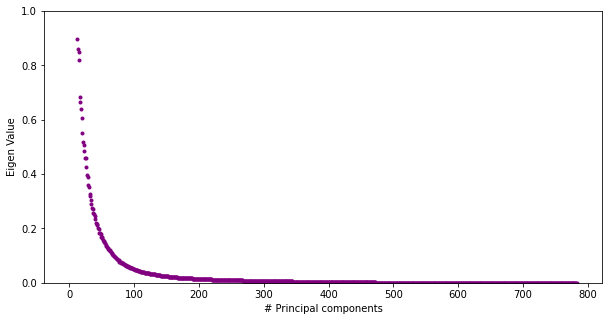

<Figure size 432x288 with 0 Axes>

In [ ]:
M_p, M_p_te = PCA(x_train, x_test, 200)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


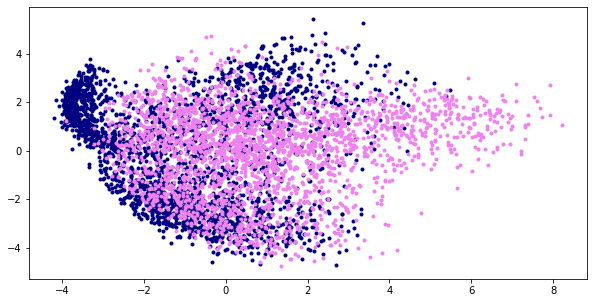

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
b0 = y_train == -1
b1 = y_train == 1
p0 = M_p[b0 == 1, :]
p1 = M_p[b1 == 1, :]
plt.scatter(p0[:,0], p0[:,1], c="navy", marker='.')
plt.scatter(p1[:,0], p1[:,1], c="violet", marker='.')
plt.show()

In [ ]:
from collections import Counter

In [ ]:
# function that caculates the euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [ ]:
# the k-nearest neighbor class
class KNN:

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Get the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [ ]:
# the nearest centroid class
class NearestCentroid:
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
        self.num_images = len(images)

    def fit(self):
        classes = np.unique(self.labels)
        self.classes = classes

        centroids = np.empty((classes.shape[0], self.images.shape[1]))
        # master list
        label_to_image = []                                     

        for cl in classes:
            # create a list for each class 
            img_label = []                                      
            for j in range(0, self.num_images):
                # if the label equals the picture label
                if self.labels[j] == cl: 
                    # append to list                      
                    img_label.append(self.images[j])
            # append to master list                   
            label_to_image.append(img_label)                    
        # calculate the mean for centroids
        for i in range(0, len(classes)):  
            centroids[i] = np.mean(label_to_image[i], axis=0)
        self.centroids = centroids

    def predict(self, images):
        classified = []
        for image in images:
            smallest_dist = 99999999
            cl = None
            for i, centroid in enumerate(self.centroids):
               # calculate the distance of the picture to each centroid
                dist = np.sqrt(np.sum((image - centroid) ** 2)) 
                if dist < smallest_dist:
                    smallest_dist = dist
                    cl = i
            # append classified picture
            classified.append([cl])                                 

        return classified

In [ ]:
# fucntion that calculates accuracy
def accuracy(y_true, y_pred):
    acc = np.sum(y_true == y_pred) / len(y_true)
    return acc

K - Nearest Neighbor

In [ ]:
start = time.time()

clf_knn=KNN(k=3)
clf_knn.fit(M_p,y_train)
predicts=clf_knn.predict(M_p_te)
print("k-NN classification accuracy: ", format(accuracy(y_test, predicts) * 100, ".4f"), "%")

end = time.time()
print(end - start)

k-NN classification accuracy:  95.1429 %
28.92301917076111


Nearest Centroid

In [ ]:
start = time.time()


clf_nc = NearestCentroid(M_p, y_train) # call nearest centroid class
# fit the training images and labels
clf_nc.fit()
# predict results with test images
predictions2 = clf_nc.predict(M_p_te)
  
predictions2 = np.array(predictions2)
predictions2 = predictions2.flatten()
predictions2 = np.where(predictions2 <= 0, -1, 1)
#print("Predictions of nearest centroid: ", predictions2)
# find the accuracy using predicitions and test labels at a scale of 100
print("Nearest Centroid classification accuracy: ", format(accuracy(y_test, predictions2)*100, ".4f"), "%")

end = time.time()
print(end - start)

Nearest Centroid classification accuracy:  79.8571 %
0.03444027900695801


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


In [ ]:
pip install libsvm

     |████████████████████████████████| 174kB 7.9MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp36-cp36m-linux_x86_64.whl size=233337 sha256=885672edbcb2f252eeaf977e1906992d4f9cb653c93ded5c07d3e7471ce9bb20
  Stored in directory: /root/.cache/pip/wheels/5e/9e/b5/dbb033107407eec2f52b8cd24cf024a4b9ec8b62ea5aee995a
Successfully built libsvm


In [ ]:
# this cell uses libsvm for classification
import libsvm
from libsvm.svmutil import *
options = '-t 2  -d 3 -c 1'
start = time.time()
m=svm_train(y_train,x_train,options)
svm_predict(y_train,x_train, m)
p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
end = time.time()
print(end - start)
#print(p_acc) #Print prediction results


Accuracy = 90.48% (4524/5000) (classification)
Accuracy = 89.1429% (624/700) (classification)
19.752896785736084


In [ ]:
import sklearn
from sklearn import svm
model = svm.SVC(kernel='poly',degree=2,C=100)
start = time.time()
model.fit(x_train, y_train)
model.predict(x_test)

print(format(model.score(x_train,y_train)*100,".4f"), "%")
print(format(model.score(x_test,y_test)*100,".4f"), "%")
end = time.time()
print(end - start)

100.0000 %
95.8571 %
10.844841480255127


In [ ]:
import cvxopt
from numpy import linalg

# definition of kernels 

def linear_kernel(x, y):
    return np.dot(x, y)

def polynomial_kernel(x, y, degree=2):
    return (np.dot(x, y) + 1) ** degree

def gaussian_kernel(x, y, gamma=2):
    return np.exp((-linalg.norm(x-y)**2) * gamma)

# svm class

class SVM():

  def __init__(self, C=1, kernel=gaussian_kernel):
    self.kernel = kernel # kernel
    self.C = C # trade off parameter
    self.a = None # lagrange multipliers
    self.bias = None # bias
  # fit function
  def fit(self, x, y):

    # get the samples and features
    rows, columns = x.shape
    # initialize the kernel matrix
    k = np.zeros((rows,rows))

    # build the kernel matrix which is NxN (N samples)
    for i in range(rows):
      for j in range(rows):
        k[i,j] = self.kernel(x[i],x[j])
  
    # solving the quadratic programming problem with cvxopt
    P = cvxopt.matrix(np.outer(y, y) * k, tc='d')
    q = cvxopt.matrix(np.ones(rows) * -1)
    A = cvxopt.matrix(y, (1, rows), tc='d')
    b = cvxopt.matrix(0.0)

    # hard margin
    if not self.C:
      G = cvxopt.matrix(np.identity(rows) * -1)
      h = cvxopt.matrix(np.zeros(rows))
    # soft margin
    else:
      G_max = np.identity(rows) * -1
      G_min = np.identity(rows)
      G = cvxopt.matrix(np.vstack((G_max, G_min)))
      h_max = cvxopt.matrix(np.zeros(rows))
      h_min = cvxopt.matrix(np.ones(rows) * self.C)
      h = cvxopt.matrix(np.vstack((h_max, h_min)))

    # find the solution 
    sol = cvxopt.solvers.qp(P, q, G, h, A, b)
    # find lagrange multipliers  
    lagr_mult = np.ravel(sol['x'])

    # get the index of the non zero lagrange multipliers
    index = lagr_mult > 0.000001
    # extract those lagrange multipliers
    self.a = lagr_mult[index]
    # find the samples that will be the support vectors
    self.x_support_vectors = x[index]
    # find labels of those support vectors
    self.y_support_vectors = y[index] 

    # calculate bias
    self.bias = self.y_support_vectors[0]
    for i in range(len(self.a)):
       self.bias -= self.a[i] * self.y_support_vectors[i] * self.kernel(self.x_support_vectors[i], self.x_support_vectors[0])

  # predict function
  def predict(self, x):

    y_pred = []
    # find the decision function
    for row in x:
          prediction = 0
          # find the label of the sample by the support vectors
          for i in range(len(self.a)):
              prediction += self.a[i] * self.y_support_vectors[i] * self.kernel(self.x_support_vectors[i], row)
          # add bias to the decision function    
          prediction += self.bias
          # find the sign of the decision function
          y_pred.append(np.sign(prediction))
    return np.array(y_pred)


In [ ]:
import time

start = time.time()

clf_svm = SVM(C=1, kernel=linear_kernel)
clf_svm.fit(M_p, y_train)
y_pred = clf_svm.predict(M_p_te)
y_pred_train = clf_svm.predict(M_p)

end = time.time()
print(end - start)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part


     pcost       dcost       gap    pres   dres
 0: -1.7900e+03 -1.4150e+04  9e+04  3e+00  7e-13
 1: -1.1747e+03 -9.7492e+03  2e+04  5e-01  7e-13
 2: -9.6316e+02 -4.6293e+03  6e+03  1e-01  5e-13
 3: -9.2477e+02 -2.3527e+03  2e+03  5e-02  5e-13
 4: -9.7351e+02 -1.5292e+03  7e+02  1e-02  5e-13
 5: -1.0122e+03 -1.3433e+03  4e+02  7e-03  5e-13
 6: -1.0434e+03 -1.2261e+03  2e+02  2e-03  6e-13
 7: -1.0634e+03 -1.1686e+03  1e+02  1e-03  6e-13
 8: -1.0787e+03 -1.1319e+03  5e+01  3e-04  6e-13
 9: -1.0873e+03 -1.1148e+03  3e+01  7e-05  6e-13
10: -1.0936e+03 -1.1048e+03  1e+01  8e-06  7e-13
11: -1.0963e+03 -1.1013e+03  5e+00  2e-06  6e-13
12: -1.0977e+03 -1.0996e+03  2e+00  5e-07  6e-13
13: -1.0983e+03 -1.0989e+03  6e-01  1e-07  6e-13
14: -1.0985e+03 -1.0987e+03  2e-01  3e-08  6e-13
15: -1.0986e+03 -1.0986e+03  3e-02  3e-09  7e-13
16: -1.0986e+03 -1.0986e+03  2e-03  2e-10  7e-13
17: -1.0986e+03 -1.0986e+03  4e-05  1e-12  7e-13
Optimal solution found.
335.94944977760315


In [ ]:
print("SVM training accuracy: ", format(accuracy(y_train,y_pred_train)*100,".4f"),"%")
print("SVM testing accuracy: ",format(accuracy(y_test,y_pred)*100,".4f"),"%")

SVM training accuracy:  91.7400 %
SVM testing accuracy:  89.1400 %
